<center><h1>Data Visualization in PYTHON</h1></center>

## The dataset is a data on Immigration to Canada from 1980 to 2013

In [1]:
import pandas as pd
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df_can = pd.read_excel(URL,
                      sheet_name = 'Canada by Citizenship (2)')


Let's get the summary of Our data

In [2]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      196 non-null    object
 1   Coverage  196 non-null    object
 2   OdName    196 non-null    object
 3   AREA      196 non-null    int64 
 4   AreaName  196 non-null    object
 5   REG       196 non-null    int64 
 6   RegName   196 non-null    object
 7   DEV       196 non-null    int64 
 8   DevName   196 non-null    object
 9   1980      196 non-null    int64 
 10  1981      196 non-null    int64 
 11  1982      196 non-null    int64 
 12  1983      196 non-null    int64 
 13  1984      196 non-null    int64 
 14  1985      196 non-null    int64 
 15  1986      196 non-null    int64 
 16  1987      196 non-null    int64 
 17  1988      196 non-null    int64 
 18  1989      196 non-null    int64 
 19  1990      196 non-null    int64 
 20  1991      196 non-null    int64 
 21  1992      196 no

As we can see from the Output above we have no Null rows in our dataset

Let's move by Displaying few rows from our data

In [4]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


For our table to be more useful for what we want to use it for, we'll love to Remove some columns like Type,Area,Reg,Dev,Coverage

In [5]:
df_can.drop(columns = { 'Type','Coverage','AREA','REG','DEV'},inplace = True)

Now lets see the output of our result

In [6]:
df_can.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


For easy Understanding we'll rename OdName to Country,AreaName to Continent,RegName to Region

In [8]:
df_can.rename(columns = {'OdName' : 'Country','AreaName': 'Continent','RegName': 'Region'},inplace = True)

In [9]:
df_can.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


<b>We need to find the total of All immigrants for Each Country from 1980 - 2013 </b>

In [11]:
df_can['Total'] = df_can.sum(axis = 1)

/tmp/wsuser/ipykernel_164/3936369500.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


<b>So let's see what we have</b>

In [12]:
df_can.head(5)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's Check if we have a Null Value in our dataset

In [18]:
df_can['Total'].isnull().sum()

0

<b>Since we're having Null values , then we can proceed</b>

<b>Let's set our Country as index fro each Sorting of our data</b>

In [19]:
df_can.set_index('Country',inplace = True)

In [20]:
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<b> For Example let's see the Continent where Japan belongs.

In [24]:
df_can.loc['Japan','Continent']

'Asia'

Let's view data for all Asian Continent

In [26]:
Continent_Asia = df_can['Continent'] == 'Asia'

In [29]:
df_can[Continent_Asia]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


<b> Now let's see Immigrant from Northern Africa Region

In [40]:
afri = df_can[(df_can['Continent'] == 'Africa') & (df_can['Region'] == 'Northern Africa')]
afri

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Egypt,Africa,Northern Africa,Developing regions,612,660,755,455,447,348,514,...,2496,2190,2356,3347,3496,5982,4663,5555,4165,72745
Libya,Africa,Northern Africa,Developing regions,5,7,9,24,10,31,23,...,196,281,198,306,282,384,352,299,255,4909
Morocco,Africa,Northern Africa,Developing regions,325,471,447,335,248,328,388,...,2939,3322,4021,4226,5532,6242,4399,3878,3261,72267
Sudan,Africa,Northern Africa,Developing regions,20,12,11,7,23,32,57,...,1310,1039,683,622,422,612,531,444,343,18506
Tunisia,Africa,Northern Africa,Developing regions,58,51,55,46,51,57,64,...,756,1065,869,950,1195,1299,1442,1503,1627,17583
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


<b> Line plot for Immigrant in Japan from 1980 - 2013

In [44]:
years = list(map(int,range(1980,2014)))

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
japan = df_can.loc['Japan',years]
japan

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

In [112]:
Egypt = df_can.loc['Egypt',years]
Egypt

1980     612
1981     660
1982     755
1983     455
1984     447
1985     348
1986     514
1987    1017
1988    1085
1989    1663
1990    2365
1991    1860
1992    1558
1993    1598
1994    2375
1995    2821
1996    2561
1997    2137
1998    1387
1999    1378
2000    1642
2001    2595
2002    2039
2003    2230
2004    2393
2005    2496
2006    2190
2007    2356
2008    3347
2009    3496
2010    5982
2011    4663
2012    5555
2013    4165
Name: Egypt, dtype: object

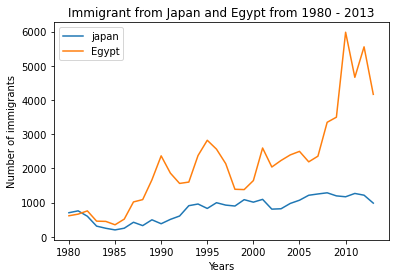

In [116]:
japan.plot(kind = 'line')
Egypt.plot(kind= 'line')
plt.title('Immigrant from Japan and Egypt from 1980 - 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.legend(labels = ['japan','Egypt'])
plt.show()

### Now Let's Visualize our with Piechart by grouping by Continents

In [80]:
continents = df_can.groupby('Continent',axis = 0).sum()
continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


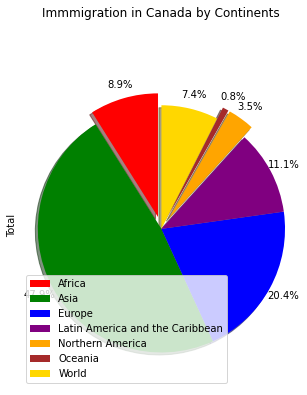

In [104]:
colors_list = ['red','green','blue','purple','orange','brown','gold']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0]
continents['Total'].plot(kind = 'pie',
                        figsize = (5,6),
                        autopct = '%1.1f%%',
                        startangle = 90,
                        shadow = True,
                        labels = None,
                        pctdistance = 1.12,
                        colors = colors_list,
                        explode = explode_list
                        )
plt.title('Immmigration in Canada by Continents',y = 1.12)
plt.legend(labels = continents.index,loc = 'best')
plt.axis('equal')
plt.show()